In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Miqueias_1 = "The word of the LORD that came to Micah the Morasthite in the days of Jotham, Ahaz, and Hezekiah, kings of Judah, which he saw concerning Samaria and Jerusalem.Hear, all you people; listen, O earth, and all that therein is: and let the Lord GOD be witness against you, the LORD from his holy temple.For, behold, the LORD comes forth out of his place, and will come down, and tread on the high places of the earth.And the mountains shall be molten under him, and the valleys shall be cleft, as wax before the fire, and as the waters that are poured down a steep place.For the transgression of Jacob is all this, and for the sins of the house of Israel. What is the transgression of Jacob? is it not Samaria? and what are the high places of Judah? are they not Jerusalem?Therefore I will make Samaria as an heap of the field, and as plantings of a vineyard: and I will pour down the stones thereof into the valley, and I will discover the foundations thereof.And all the graven images thereof shall be beaten to pieces, and all the hires thereof shall be burned with the fire, and all the idols thereof will I lay desolate: for she gathered it of the hire of an harlot, and they shall return to the hire of an harlot.Therefore I will wail and howl, I will go stripped and naked: I will make a wailing like the dragons, and mourning as the owls.For her wound is incurable; for it is come to Judah; he is come to the gate of my people, even to Jerusalem.Declare you it not at Gath, weep you not at all: in the house of Aphrah roll yourself in the dust.Pass you away, you inhabitant of Saphir, having your shame naked: the inhabitant of Zaanan came not forth in the mourning of Bethezel; he shall receive of you his standing.For the inhabitant of Maroth waited carefully for good: but evil came down from the LORD to the gate of Jerusalem.O you inhabitant of Lachish, bind the chariot to the swift beast: she is the beginning of the sin to the daughter of Zion: for the transgressions of Israel were found in you.Therefore shall you give presents to Moreshethgath: the houses of Achzib shall be a lie to the kings of Israel.Yet will I bring an heir to you, O inhabitant of Mareshah: he shall come to Adullam the glory of Israel.Make you bald, and poll you for your delicate children; enlarge your baldness as the eagle; for they are gone into captivity from you.".lower()

In [6]:
Miqueias_2 = "Woe to them that devise iniquity, and work evil on their beds! when the morning is light, they practice it, because it is in the power of their hand.And they covet fields, and take them by violence; and houses, and take them away: so they oppress a man and his house, even a man and his heritage.Therefore thus said the LORD; Behold, against this family do I devise an evil, from which you shall not remove your necks; neither shall you go haughtily: for this time is evil.In that day shall one take up a parable against you, and lament with a doleful lamentation, and say, We be utterly spoiled: he has changed the portion of my people: how has he removed it from me! turning away he has divided our fields.Therefore you shall have none that shall cast a cord by lot in the congregation of the LORD.Prophesy you not, say they to them that prophesy: they shall not prophesy to them, that they shall not take shame.O you that are named the house of Jacob, is the spirit of the LORD straitened? are these his doings? do not my words do good to him that walks uprightly?Even of late my people is risen up as an enemy: you pull off the robe with the garment from them that pass by securely as men averse from war.The women of my people have you cast out from their pleasant houses; from their children have you taken away my glory for ever.Arise you, and depart; for this is not your rest: because it is polluted, it shall destroy you, even with a sore destruction.If a man walking in the spirit and falsehood do lie, saying, I will prophesy to you of wine and of strong drink; he shall even be the prophet of this people.I will surely assemble, O Jacob, all of you; I will surely gather the remnant of Israel; I will put them together as the sheep of Bozrah, as the flock in the middle of their fold: they shall make great noise by reason of the multitude of men.The breaker is come up before them: they have broken up, and have passed through the gate, and are gone out by it: and their king shall pass before them, and the LORD on the head of them.".lower()

In [7]:
Miqueias_3 = "And I said, Hear, I pray you, O heads of Jacob, and you princes of the house of Israel; Is it not for you to know judgment?Who hate the good, and love the evil; who pluck off their skin from off them, and their flesh from off their bones;Who also eat the flesh of my people, and flay their skin from off them; and they break their bones, and chop them in pieces, as for the pot, and as flesh within the caldron.Then shall they cry to the LORD, but he will not hear them: he will even hide his face from them at that time, as they have behaved themselves ill in their doings.Thus said the LORD concerning the prophets that make my people err, that bite with their teeth, and cry, Peace; and he that puts not into their mouths, they even prepare war against him.Therefore night shall be to you, that you shall not have a vision; and it shall be dark to you, that you shall not divine; and the sun shall go down over the prophets, and the day shall be dark over them.Then shall the seers be ashamed, and the diviners confounded: yes, they shall all cover their lips; for there is no answer of God.But truly I am full of power by the spirit of the LORD, and of judgment, and of might, to declare to Jacob his transgression, and to Israel his sin.Hear this, I pray you, you heads of the house of Jacob, and princes of the house of Israel, that abhor judgment, and pervert all equity.They build up Zion with blood, and Jerusalem with iniquity.The heads thereof judge for reward, and the priests thereof teach for hire, and the prophets thereof divine for money: yet will they lean on the LORD, and say, Is not the LORD among us? none evil can come on us.Therefore shall Zion for your sake be plowed as a field, and Jerusalem shall become heaps, and the mountain of the house as the high places of the forest.".lower()

In [8]:
Miqueias_4 = "But in the last days it shall come to pass, that the mountain of the house of the LORD shall be established in the top of the mountains, and it shall be exalted above the hills; and people shall flow to it.And many nations shall come, and say, Come, and let us go up to the mountain of the LORD, and to the house of the God of Jacob; and he will teach us of his ways, and we will walk in his paths: for the law shall go forth of Zion, and the word of the LORD from Jerusalem.And he shall judge among many people, and rebuke strong nations afar off; and they shall beat their swords into plowshares, and their spears into pruning hooks: nation shall not lift up a sword against nation, neither shall they learn war any more.But they shall sit every man under his vine and under his fig tree; and none shall make them afraid: for the mouth of the LORD of hosts has spoken it.For all people will walk every one in the name of his god, and we will walk in the name of the LORD our God for ever and ever.In that day, said the LORD, will I assemble her that halts, and I will gather her that is driven out, and her that I have afflicted;And I will make her that halted a remnant, and her that was cast far off a strong nation: and the LORD shall reign over them in mount Zion from now on, even for ever.And you, O tower of the flock, the strong hold of the daughter of Zion, to you shall it come, even the first dominion; the kingdom shall come to the daughter of Jerusalem.Now why do you cry out aloud? is there no king in you? is your counselor perished? for pangs have taken you as a woman in travail.Be in pain, and labor to bring forth, O daughter of Zion, like a woman in travail: for now shall you go forth out of the city, and you shall dwell in the field, and you shall go even to Babylon; there shall you be delivered; there the LORD shall redeem you from the hand of your enemies.Now also many nations are gathered against you, that say, Let her be defiled, and let our eye look on Zion.But they know not the thoughts of the LORD, neither understand they his counsel: for he shall gather them as the sheaves into the floor.Arise and thresh, O daughter of Zion: for I will make your horn iron, and I will make your hoofs brass: and you shall beat in pieces many people: and I will consecrate their gain to the LORD, and their substance to the Lord of the whole earth.".lower()

In [9]:
Miqueias_5 = "Now gather yourself in troops, O daughter of troops: he has laid siege against us: they shall smite the judge of Israel with a rod on the cheek.But you, Bethlehem Ephratah, though you be little among the thousands of Judah, yet out of you shall he come forth to me that is to be ruler in Israel; whose goings forth have been from of old, from everlasting.Therefore will he give them up, until the time that she which travails has brought forth: then the remnant of his brothers shall return to the children of Israel.And he shall stand and feed in the strength of the LORD, in the majesty of the name of the LORD his God; and they shall abide: for now shall he be great to the ends of the earth.And this man shall be the peace, when the Assyrian shall come into our land: and when he shall tread in our palaces, then shall we raise against him seven shepherds, and eight principal men.And they shall waste the land of Assyria with the sword, and the land of Nimrod in the entrances thereof: thus shall he deliver us from the Assyrian, when he comes into our land, and when he treads within our borders.And the remnant of Jacob shall be in the middle of many people as a dew from the LORD, as the showers on the grass, that tarries not for man, nor waits for the sons of men.And the remnant of Jacob shall be among the Gentiles in the middle of many people as a lion among the beasts of the forest, as a young lion among the flocks of sheep: who, if he go through, both treads down, and tears in pieces, and none can deliver.Your hand shall be lifted up on your adversaries, and all your enemies shall be cut off.And it shall come to pass in that day, said the LORD, that I will cut off your horses out of the middle of you, and I will destroy your chariots:And I will cut off the cities of your land, and throw down all your strong holds:And I will cut off witchcrafts out of your hand; and you shall have no more soothsayers:Your graven images also will I cut off, and your standing images out of the middle of you; and you shall no more worship the work of your hands.And I will pluck up your groves out of the middle of you: so will I destroy your cities.And I will execute vengeance in anger and fury on the heathen, such as they have not heard.".lower()

In [38]:
Miqueias_6 = "Hear you now what the LORD said; Arise, contend you before the mountains, and let the hills hear your voice.Hear you, O mountains, the LORD' controversy, and you strong foundations of the earth: for the LORD has a controversy with his people, and he will plead with Israel.O my people, what have I done to you? and wherein have I wearied you? testify against me.For I brought you up out of the land of Egypt, and redeemed you out of the house of servants; and I sent before you Moses, Aaron, and Miriam.O my people, remember now what Balak king of Moab consulted, and what Balaam the son of Beor answered him from Shittim to Gilgal; that you may know the righteousness of the LORD.With which shall I come before the LORD, and bow myself before the high God? shall I come before him with burnt offerings, with calves of a year old?Will the LORD be pleased with thousands of rams, or with ten thousands of rivers of oil? shall I give my firstborn for my transgression, the fruit of my body for the sin of my soul?He has showed you, O man, what is good; and what does the LORD require of you, but to do justly, and to love mercy, and to walk humbly with your God?The LORD' voice cries to the city, and the man of wisdom shall see your name: hear you the rod, and who has appointed it.Are there yet the treasures of wickedness in the house of the wicked, and the scant measure that is abominable?Shall I count them pure with the wicked balances, and with the bag of deceitful weights?For the rich men thereof are full of violence, and the inhabitants thereof have spoken lies, and their tongue is deceitful in their mouth.Therefore also will I make you sick in smiting you, in making you desolate because of your sins.You shall eat, but not be satisfied; and your casting down shall be in the middle of you; and you shall take hold, but shall not deliver; and that which you deliver will I give up to the sword.You shall sow, but you shall not reap; you shall tread the olives, but you shall not anoint you with oil; and sweet wine, but shall not drink wine.For the statutes of Omri are kept, and all the works of the house of Ahab, and you walk in their counsels; that I should make you a desolation, and the inhabitants thereof an hissing: therefore you shall bear the reproach of my people.".lower()

In [39]:
Miqueias_7 = "Woe is me! for I am as when they have gathered the summer fruits, as the grape gleanings of the vintage: there is no cluster to eat: my soul desired the first ripe fruit.The good man is perished out of the earth: and there is none upright among men: they all lie in wait for blood; they hunt every man his brother with a net.That they may do evil with both hands earnestly, the prince asks, and the judge asks for a reward; and the great man, he utters his mischievous desire: so they wrap it up.The best of them is as a brier: the most upright is sharper than a thorn hedge: the day of your watchmen and your visitation comes; now shall be their perplexity.Trust you not in a friend, put you not confidence in a guide: keep the doors of your mouth from her that lies in your bosom.For the son dishonors the father, the daughter rises up against her mother, the daughter in law against her mother in law; a man' enemies are the men of his own house.Therefore I will look to the LORD; I will wait for the God of my salvation: my God will hear me.Rejoice not against me, O my enemy: when I fall, I shall arise; when I sit in darkness, the LORD shall be a light to me.I will bear the indignation of the LORD, because I have sinned against him, until he plead my cause, and execute judgment for me: he will bring me forth to the light, and I shall behold his righteousness.Then she that is my enemy shall see it, and shame shall cover her which said to me, Where is the LORD your God? my eyes shall behold her: now shall she be trodden down as the mire of the streets.In the day that your walls are to be built, in that day shall the decree be far removed.In that day also he shall come even to you from Assyria, and from the fortified cities, and from the fortress even to the river, and from sea to sea, and from mountain to mountain.Notwithstanding the land shall be desolate because of them that dwell therein, for the fruit of their doings.Feed your people with your rod, the flock of your heritage, which dwell solitarily in the wood, in the middle of Carmel: let them feed in Bashan and Gilead, as in the days of old.According to the days of your coming out of the land of Egypt will I show to him marvelous things.The nations shall see and be confounded at all their might: they shall lay their hand on their mouth, their ears shall be deaf.They shall lick the dust like a serpent, they shall move out of their holes like worms of the earth: they shall be afraid of the LORD our God, and shall fear because of you.Who is a God like to you, that pardons iniquity, and passes by the transgression of the remnant of his heritage? he retains not his anger for ever, because he delights in mercy.He will turn again, he will have compassion on us; he will subdue our iniquities; and you will cast all their sins into the depths of the sea.You will perform the truth to Jacob, and the mercy to Abraham, which you have sworn to our fathers from the days of old.".lower()

In [45]:
tokens = nltk.word_tokenize(Miqueias_7)

In [46]:
stop_words = set(stopwords.words('english'))

In [47]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [48]:
print(filtered_sentence1)

['woe', '!', 'gathered', 'summer', 'fruits', ',', 'grape', 'gleanings', 'vintage', ':', 'cluster', 'eat', ':', 'soul', 'desired', 'first', 'ripe', 'fruit.the', 'good', 'man', 'perished', 'earth', ':', 'none', 'upright', 'among', 'men', ':', 'lie', 'wait', 'blood', ';', 'hunt', 'every', 'man', 'brother', 'net.that', 'may', 'evil', 'hands', 'earnestly', ',', 'prince', 'asks', ',', 'judge', 'asks', 'reward', ';', 'great', 'man', ',', 'utters', 'mischievous', 'desire', ':', 'wrap', 'up.the', 'best', 'brier', ':', 'upright', 'sharper', 'thorn', 'hedge', ':', 'day', 'watchmen', 'visitation', 'comes', ';', 'shall', 'perplexity.trust', 'friend', ',', 'put', 'confidence', 'guide', ':', 'keep', 'doors', 'mouth', 'lies', 'bosom.for', 'son', 'dishonors', 'father', ',', 'daughter', 'rises', 'mother', ',', 'daughter', 'law', 'mother', 'law', ';', 'man', "'", 'enemies', 'men', 'house.therefore', 'look', 'lord', ';', 'wait', 'god', 'salvation', ':', 'god', 'hear', 'me.rejoice', ',', 'enemy', ':', 'fal

In [49]:
data =np.array([["Miqueias_1", "'word', 'lord', 'came', 'micah', 'morasthite', 'days', 'jotham', ',', 'ahaz', ',', 'hezekiah', ',', 'kings', 'judah', ',', 'saw', 'concerning', 'samaria', 'jerusalem.hear', ',', 'people', ';', 'listen', ',', 'earth', ',', 'therein', ':', 'let', 'lord', 'god', 'witness', ',', 'lord', 'holy', 'temple.for', ',', 'behold', ',', 'lord', 'comes', 'forth', 'place', ',', 'come', ',', 'tread', 'high', 'places', 'earth.and', 'mountains', 'shall', 'molten', ',', 'valleys', 'shall', 'cleft', ',', 'wax', 'fire', ',', 'waters', 'poured', 'steep', 'place.for', 'transgression', 'jacob', ',', 'sins', 'house', 'israel', '.', 'transgression', 'jacob', '?', 'samaria', '?', 'high', 'places', 'judah', '?', 'jerusalem', '?', 'therefore', 'make', 'samaria', 'heap', 'field', ',', 'plantings', 'vineyard', ':', 'pour', 'stones', 'thereof', 'valley', ',', 'discover', 'foundations', 'thereof.and', 'graven', 'images', 'thereof', 'shall', 'beaten', 'pieces', ',', 'hires', 'thereof', 'shall', 'burned', 'fire', ',', 'idols', 'thereof', 'lay', 'desolate', ':', 'gathered', 'hire', 'harlot', ',', 'shall', 'return', 'hire', 'harlot.therefore', 'wail', 'howl', ',', 'go', 'stripped', 'naked', ':', 'make', 'wailing', 'like', 'dragons', ',', 'mourning', 'owls.for', 'wound', 'incurable', ';', 'come', 'judah', ';', 'come', 'gate', 'people', ',', 'even', 'jerusalem.declare', 'gath', ',', 'weep', ':', 'house', 'aphrah', 'roll', 'dust.pass', 'away', ',', 'inhabitant', 'saphir', ',', 'shame', 'naked', ':', 'inhabitant', 'zaanan', 'came', 'forth', 'mourning', 'bethezel', ';', 'shall', 'receive', 'standing.for', 'inhabitant', 'maroth', 'waited', 'carefully', 'good', ':', 'evil', 'came', 'lord', 'gate', 'jerusalem.o', 'inhabitant', 'lachish', ',', 'bind', 'chariot', 'swift', 'beast', ':', 'beginning', 'sin', 'daughter', 'zion', ':', 'transgressions', 'israel', 'found', 'you.therefore', 'shall', 'give', 'presents', 'moreshethgath', ':', 'houses', 'achzib', 'shall', 'lie', 'kings', 'israel.yet', 'bring', 'heir', ',', 'inhabitant', 'mareshah', ':', 'shall', 'come', 'adullam', 'glory', 'israel.make', 'bald', ',', 'poll', 'delicate', 'children', ';', 'enlarge', 'baldness', 'eagle', ';', 'gone', 'captivity', '.'"],
               ["Miqueias_2", "'woe', 'devise', 'iniquity', ',', 'work', 'evil', 'beds', '!', 'morning', 'light', ',', 'practice', ',', 'power', 'hand.and', 'covet', 'fields', ',', 'take', 'violence', ';', 'houses', ',', 'take', 'away', ':', 'oppress', 'man', 'house', ',', 'even', 'man', 'heritage.therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'family', 'devise', 'evil', ',', 'shall', 'remove', 'necks', ';', 'neither', 'shall', 'go', 'haughtily', ':', 'time', 'evil.in', 'day', 'shall', 'one', 'take', 'parable', ',', 'lament', 'doleful', 'lamentation', ',', 'say', ',', 'utterly', 'spoiled', ':', 'changed', 'portion', 'people', ':', 'removed', '!', 'turning', 'away', 'divided', 'fields.therefore', 'shall', 'none', 'shall', 'cast', 'cord', 'lot', 'congregation', 'lord.prophesy', ',', 'say', 'prophesy', ':', 'shall', 'prophesy', ',', 'shall', 'take', 'shame.o', 'named', 'house', 'jacob', ',', 'spirit', 'lord', 'straitened', '?', 'doings', '?', 'words', 'good', 'walks', 'uprightly', '?', 'even', 'late', 'people', 'risen', 'enemy', ':', 'pull', 'robe', 'garment', 'pass', 'securely', 'men', 'averse', 'war.the', 'women', 'people', 'cast', 'pleasant', 'houses', ';', 'children', 'taken', 'away', 'glory', 'ever.arise', ',', 'depart', ';', 'rest', ':', 'polluted', ',', 'shall', 'destroy', ',', 'even', 'sore', 'destruction.if', 'man', 'walking', 'spirit', 'falsehood', 'lie', ',', 'saying', ',', 'prophesy', 'wine', 'strong', 'drink', ';', 'shall', 'even', 'prophet', 'people.i', 'surely', 'assemble', ',', 'jacob', ',', ';', 'surely', 'gather', 'remnant', 'israel', ';', 'put', 'together', 'sheep', 'bozrah', ',', 'flock', 'middle', 'fold', ':', 'shall', 'make', 'great', 'noise', 'reason', 'multitude', 'men.the', 'breaker', 'come', ':', 'broken', ',', 'passed', 'gate', ',', 'gone', ':', 'king', 'shall', 'pass', ',', 'lord', 'head', '.'"],
               ["Miqueias_3", "'said', ',', 'hear', ',', 'pray', ',', 'heads', 'jacob', ',', 'princes', 'house', 'israel', ';', 'know', 'judgment', '?', 'hate', 'good', ',', 'love', 'evil', ';', 'pluck', 'skin', ',', 'flesh', 'bones', ';', 'also', 'eat', 'flesh', 'people', ',', 'flay', 'skin', ';', 'break', 'bones', ',', 'chop', 'pieces', ',', 'pot', ',', 'flesh', 'within', 'caldron.then', 'shall', 'cry', 'lord', ',', 'hear', ':', 'even', 'hide', 'face', 'time', ',', 'behaved', 'ill', 'doings.thus', 'said', 'lord', 'concerning', 'prophets', 'make', 'people', 'err', ',', 'bite', 'teeth', ',', 'cry', ',', 'peace', ';', 'puts', 'mouths', ',', 'even', 'prepare', 'war', 'him.therefore', 'night', 'shall', ',', 'shall', 'vision', ';', 'shall', 'dark', ',', 'shall', 'divine', ';', 'sun', 'shall', 'go', 'prophets', ',', 'day', 'shall', 'dark', 'them.then', 'shall', 'seers', 'ashamed', ',', 'diviners', 'confounded', ':', 'yes', ',', 'shall', 'cover', 'lips', ';', 'answer', 'god.but', 'truly', 'full', 'power', 'spirit', 'lord', ',', 'judgment', ',', 'might', ',', 'declare', 'jacob', 'transgression', ',', 'israel', 'sin.hear', ',', 'pray', ',', 'heads', 'house', 'jacob', ',', 'princes', 'house', 'israel', ',', 'abhor', 'judgment', ',', 'pervert', 'equity.they', 'build', 'zion', 'blood', ',', 'jerusalem', 'iniquity.the', 'heads', 'thereof', 'judge', 'reward', ',', 'priests', 'thereof', 'teach', 'hire', ',', 'prophets', 'thereof', 'divine', 'money', ':', 'yet', 'lean', 'lord', ',', 'say', ',', 'lord', 'among', 'us', '?', 'none', 'evil', 'come', 'us.therefore', 'shall', 'zion', 'sake', 'plowed', 'field', ',', 'jerusalem', 'shall', 'become', 'heaps', ',', 'mountain', 'house', 'high', 'places', 'forest', '.'"],
               ["Miqueias_4", "'last', 'days', 'shall', 'come', 'pass', ',', 'mountain', 'house', 'lord', 'shall', 'established', 'top', 'mountains', ',', 'shall', 'exalted', 'hills', ';', 'people', 'shall', 'flow', 'it.and', 'many', 'nations', 'shall', 'come', ',', 'say', ',', 'come', ',', 'let', 'us', 'go', 'mountain', 'lord', ',', 'house', 'god', 'jacob', ';', 'teach', 'us', 'ways', ',', 'walk', 'paths', ':', 'law', 'shall', 'go', 'forth', 'zion', ',', 'word', 'lord', 'jerusalem.and', 'shall', 'judge', 'among', 'many', 'people', ',', 'rebuke', 'strong', 'nations', 'afar', ';', 'shall', 'beat', 'swords', 'plowshares', ',', 'spears', 'pruning', 'hooks', ':', 'nation', 'shall', 'lift', 'sword', 'nation', ',', 'neither', 'shall', 'learn', 'war', 'more.but', 'shall', 'sit', 'every', 'man', 'vine', 'fig', 'tree', ';', 'none', 'shall', 'make', 'afraid', ':', 'mouth', 'lord', 'hosts', 'spoken', 'it.for', 'people', 'walk', 'every', 'one', 'name', 'god', ',', 'walk', 'name', 'lord', 'god', 'ever', 'ever.in', 'day', ',', 'said', 'lord', ',', 'assemble', 'halts', ',', 'gather', 'driven', ',', 'afflicted', ';', 'make', 'halted', 'remnant', ',', 'cast', 'far', 'strong', 'nation', ':', 'lord', 'shall', 'reign', 'mount', 'zion', ',', 'even', 'ever.and', ',', 'tower', 'flock', ',', 'strong', 'hold', 'daughter', 'zion', ',', 'shall', 'come', ',', 'even', 'first', 'dominion', ';', 'kingdom', 'shall', 'come', 'daughter', 'jerusalem.now', 'cry', 'aloud', '?', 'king', '?', 'counselor', 'perished', '?', 'pangs', 'taken', 'woman', 'travail.be', 'pain', ',', 'labor', 'bring', 'forth', ',', 'daughter', 'zion', ',', 'like', 'woman', 'travail', ':', 'shall', 'go', 'forth', 'city', ',', 'shall', 'dwell', 'field', ',', 'shall', 'go', 'even', 'babylon', ';', 'shall', 'delivered', ';', 'lord', 'shall', 'redeem', 'hand', 'enemies.now', 'also', 'many', 'nations', 'gathered', ',', 'say', ',', 'let', 'defiled', ',', 'let', 'eye', 'look', 'zion.but', 'know', 'thoughts', 'lord', ',', 'neither', 'understand', 'counsel', ':', 'shall', 'gather', 'sheaves', 'floor.arise', 'thresh', ',', 'daughter', 'zion', ':', 'make', 'horn', 'iron', ',', 'make', 'hoofs', 'brass', ':', 'shall', 'beat', 'pieces', 'many', 'people', ':', 'consecrate', 'gain', 'lord', ',', 'substance', 'lord', 'whole', 'earth', '.'"],
               ["Miqueias_5", "'gather', 'troops', ',', 'daughter', 'troops', ':', 'laid', 'siege', 'us', ':', 'shall', 'smite', 'judge', 'israel', 'rod', 'cheek.but', ',', 'bethlehem', 'ephratah', ',', 'though', 'little', 'among', 'thousands', 'judah', ',', 'yet', 'shall', 'come', 'forth', 'ruler', 'israel', ';', 'whose', 'goings', 'forth', 'old', ',', 'everlasting.therefore', 'give', ',', 'time', 'travails', 'brought', 'forth', ':', 'remnant', 'brothers', 'shall', 'return', 'children', 'israel.and', 'shall', 'stand', 'feed', 'strength', 'lord', ',', 'majesty', 'name', 'lord', 'god', ';', 'shall', 'abide', ':', 'shall', 'great', 'ends', 'earth.and', 'man', 'shall', 'peace', ',', 'assyrian', 'shall', 'come', 'land', ':', 'shall', 'tread', 'palaces', ',', 'shall', 'raise', 'seven', 'shepherds', ',', 'eight', 'principal', 'men.and', 'shall', 'waste', 'land', 'assyria', 'sword', ',', 'land', 'nimrod', 'entrances', 'thereof', ':', 'thus', 'shall', 'deliver', 'us', 'assyrian', ',', 'comes', 'land', ',', 'treads', 'within', 'borders.and', 'remnant', 'jacob', 'shall', 'middle', 'many', 'people', 'dew', 'lord', ',', 'showers', 'grass', ',', 'tarries', 'man', ',', 'waits', 'sons', 'men.and', 'remnant', 'jacob', 'shall', 'among', 'gentiles', 'middle', 'many', 'people', 'lion', 'among', 'beasts', 'forest', ',', 'young', 'lion', 'among', 'flocks', 'sheep', ':', ',', 'go', ',', 'treads', ',', 'tears', 'pieces', ',', 'none', 'deliver.your', 'hand', 'shall', 'lifted', 'adversaries', ',', 'enemies', 'shall', 'cut', 'off.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', ',', 'cut', 'horses', 'middle', ',', 'destroy', 'chariots', ':', 'cut', 'cities', 'land', ',', 'throw', 'strong', 'holds', ':', 'cut', 'witchcrafts', 'hand', ';', 'shall', 'soothsayers', ':', 'graven', 'images', 'also', 'cut', ',', 'standing', 'images', 'middle', ';', 'shall', 'worship', 'work', 'hands.and', 'pluck', 'groves', 'middle', ':', 'destroy', 'cities.and', 'execute', 'vengeance', 'anger', 'fury', 'heathen', ',', 'heard', '.'"],
               ["Miqueias_6", "'hear', 'lord', 'said', ';', 'arise', ',', 'contend', 'mountains', ',', 'let', 'hills', 'hear', 'voice.hear', ',', 'mountains', ',', 'lord', ', 'controversy', ',', 'strong', 'foundations', 'earth', ':', 'lord', 'controversy', 'people', ',', 'plead', 'israel.o', 'people', ',', 'done', '?', 'wherein', 'wearied', '?', 'testify', 'me.for', 'brought', 'land', 'egypt', ',', 'redeemed', 'house', 'servants', ';', 'sent', 'moses', ',', 'aaron', ',', 'miriam.o', 'people', ',', 'remember', 'balak', 'king', 'moab', 'consulted', ',', 'balaam', 'son', 'beor', 'answered', 'shittim', 'gilgal', ';', 'may', 'know', 'righteousness', 'lord.with', 'shall', 'come', 'lord', ',', 'bow', 'high', 'god', '?', 'shall', 'come', 'burnt', 'offerings', ',', 'calves', 'year', 'old', '?', 'lord', 'pleased', 'thousands', 'rams', ',', 'ten', 'thousands', 'rivers', 'oil', '?', 'shall', 'give', 'firstborn', 'transgression', ',', 'fruit', 'body', 'sin', 'soul', '?', 'showed', ',', 'man', ',', 'good', ';', 'lord', 'require', ',', 'justly', ',', 'love', 'mercy', ',', 'walk', 'humbly', 'god', '?', 'lord', ', 'voice', 'cries', 'city', ',', 'man', 'wisdom', 'shall', 'see', 'name', ':', 'hear', 'rod', ',', 'appointed', 'it.are', 'yet', 'treasures', 'wickedness', 'house', 'wicked', ',', 'scant', 'measure', 'abominable', '?', 'shall', 'count', 'pure', 'wicked', 'balances', ',', 'bag', 'deceitful', 'weights', '?', 'rich', 'men', 'thereof', 'full', 'violence', ',', 'inhabitants', 'thereof', 'spoken', 'lies', ',', 'tongue', 'deceitful', 'mouth.therefore', 'also', 'make', 'sick', 'smiting', ',', 'making', 'desolate', 'sins.you', 'shall', 'eat', ',', 'satisfied', ';', 'casting', 'shall', 'middle', ';', 'shall', 'take', 'hold', ',', 'shall', 'deliver', ';', 'deliver', 'give', 'sword.you', 'shall', 'sow', ',', 'shall', 'reap', ';', 'shall', 'tread', 'olives', ',', 'shall', 'anoint', 'oil', ';', 'sweet', 'wine', ',', 'shall', 'drink', 'wine.for', 'statutes', 'omri', 'kept', ',', 'works', 'house', 'ahab', ',', 'walk', 'counsels', ';', 'make', 'desolation', ',', 'inhabitants', 'thereof', 'hissing', ':', 'therefore', 'shall', 'bear', 'reproach', 'people', '.'"],
               ["Miqueias_7", "'woe', '!', 'gathered', 'summer', 'fruits', ',', 'grape', 'gleanings', 'vintage', ':', 'cluster', 'eat', ':', 'soul', 'desired', 'first', 'ripe', 'fruit.the', 'good', 'man', 'perished', 'earth', ':', 'none', 'upright', 'among', 'men', ':', 'lie', 'wait', 'blood', ';', 'hunt', 'every', 'man', 'brother', 'net.that', 'may', 'evil', 'hands', 'earnestly', ',', 'prince', 'asks', ',', 'judge', 'asks', 'reward', ';', 'great', 'man', ',', 'utters', 'mischievous', 'desire', ':', 'wrap', 'up.the', 'best', 'brier', ':', 'upright', 'sharper', 'thorn', 'hedge', ':', 'day', 'watchmen', 'visitation', 'comes', ';', 'shall', 'perplexity.trust', 'friend', ',', 'put', 'confidence', 'guide', ':', 'keep', 'doors', 'mouth', 'lies', 'bosom.for', 'son', 'dishonors', 'father', ',', 'daughter', 'rises', 'mother', ',', 'daughter', 'law', 'mother', 'law', ';', 'man', ', 'enemies', 'men', 'house.therefore', 'look', 'lord', ';', 'wait', 'god', 'salvation', ':', 'god', 'hear', 'me.rejoice', ',', 'enemy', ':', 'fall', ',', 'shall', 'arise', ';', 'sit', 'darkness', ',', 'lord', 'shall', 'light', 'me.i', 'bear', 'indignation', 'lord', ',', 'sinned', ',', 'plead', 'cause', ',', 'execute', 'judgment', ':', 'bring', 'forth', 'light', ',', 'shall', 'behold', 'righteousness.then', 'enemy', 'shall', 'see', ',', 'shame', 'shall', 'cover', 'said', ',', 'lord', 'god', '?', 'eyes', 'shall', 'behold', ':', 'shall', 'trodden', 'mire', 'streets.in', 'day', 'walls', 'built', ',', 'day', 'shall', 'decree', 'far', 'removed.in', 'day', 'also', 'shall', 'come', 'even', 'assyria', ',', 'fortified', 'cities', ',', 'fortress', 'even', 'river', ',', 'sea', 'sea', ',', 'mountain', 'mountain.notwithstanding', 'land', 'shall', 'desolate', 'dwell', 'therein', ',', 'fruit', 'doings.feed', 'people', 'rod', ',', 'flock', 'heritage', ',', 'dwell', 'solitarily', 'wood', ',', 'middle', 'carmel', ':', 'let', 'feed', 'bashan', 'gilead', ',', 'days', 'old.according', 'days', 'coming', 'land', 'egypt', 'show', 'marvelous', 'things.the', 'nations', 'shall', 'see', 'confounded', 'might', ':', 'shall', 'lay', 'hand', 'mouth', ',', 'ears', 'shall', 'deaf.they', 'shall', 'lick', 'dust', 'like', 'serpent', ',', 'shall', 'move', 'holes', 'like', 'worms', 'earth', ':', 'shall', 'afraid', 'lord', 'god', ',', 'shall', 'fear', 'you.who', 'god', 'like', ',', 'pardons', 'iniquity', ',', 'passes', 'transgression', 'remnant', 'heritage', '?', 'retains', 'anger', 'ever', ',', 'delights', 'mercy.he', 'turn', ',', 'compassion', 'us', ';', 'subdue', 'iniquities', ';', 'cast', 'sins', 'depths', 'sea.you', 'perform', 'truth', 'jacob', ',', 'mercy', 'abraham', ',', 'sworn', 'fathers', 'days', 'old', '.'"]])

In [51]:
df = pd.DataFrame(data, index=range(100,107),columns=['Autor', 'Livro'])

In [52]:
print(df)

          Autor                                              Livro
100  Miqueias_1  'word', 'lord', 'came', 'micah', 'morasthite',...
101  Miqueias_2  'woe', 'devise', 'iniquity', ',', 'work', 'evi...
102  Miqueias_3  'said', ',', 'hear', ',', 'pray', ',', 'heads'...
103  Miqueias_4  'last', 'days', 'shall', 'come', 'pass', ',', ...
104  Miqueias_5  'gather', 'troops', ',', 'daughter', 'troops',...
105  Miqueias_6  'hear', 'lord', 'said', ';', 'arise', ',', 'co...
106  Miqueias_7  'woe', '!', 'gathered', 'summer', 'fruits', ',...


In [53]:
corpus = df['Livro'].tolist()

In [54]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

7 rows


,0,1,2,3,4,5,6
achzib shall lie,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
adullam glory israel,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
ahaz hezekiah kings,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
and graven images,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
and mountains shall,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
aphrah roll dust,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
away inhabitant saphir,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
bald poll delicate,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
baldness eagle gone,0.070888,0.0,0.0,0.0,0.0,0.0,0.0
beast beginning sin,0.070888,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [56]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [57]:
k = 2
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


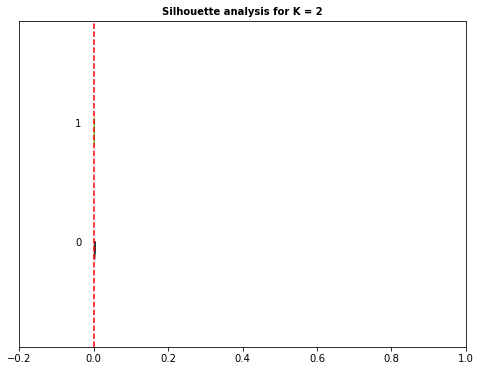

In [58]:
silhouette(kmeans_results, final_df, plot=True)

In [59]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [2]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

NameError: name 'kmeans_results' is not defined

In [61]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

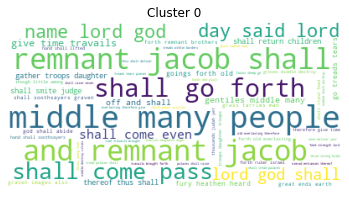

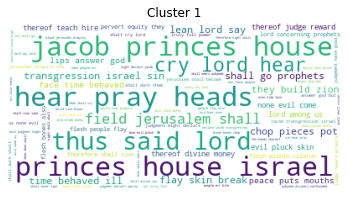

In [62]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [63]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Miqueias_1,"'word', 'lord', 'came', 'micah', 'morasthite',...",1
101,Miqueias_2,"'woe', 'devise', 'iniquity', ',', 'work', 'evi...",1
102,Miqueias_3,"'said', ',', 'hear', ',', 'pray', ',', 'heads'...",1
103,Miqueias_4,"'last', 'days', 'shall', 'come', 'pass', ',', ...",0
104,Miqueias_5,"'gather', 'troops', ',', 'daughter', 'troops',...",0


In [64]:
print(df)

          Autor                                              Livro  label
100  Miqueias_1  'word', 'lord', 'came', 'micah', 'morasthite',...      1
101  Miqueias_2  'woe', 'devise', 'iniquity', ',', 'work', 'evi...      1
102  Miqueias_3  'said', ',', 'hear', ',', 'pray', ',', 'heads'...      1
103  Miqueias_4  'last', 'days', 'shall', 'come', 'pass', ',', ...      0
104  Miqueias_5  'gather', 'troops', ',', 'daughter', 'troops',...      0
105  Miqueias_6  'hear', 'lord', 'said', ';', 'arise', ',', 'co...      1
106  Miqueias_7  'woe', '!', 'gathered', 'summer', 'fruits', ',...      0
